## Deustsch Jozsa algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, assemble, transpile

from qiskit.visualization import plot_histogram

In [2]:
# create a balanced oracle for 4 qubits (plus one output qubit)
def constant_oracle():
    oracle = QuantumCircuit(5)
    oracle.barrier()
    # could also just do nothing
    oracle.x(4)
    oracle.barrier()
    return oracle
    
def balanced_oracle():
    oracle = QuantumCircuit(5)
    oracle.barrier()
    oracle.cx(0, 4)
    oracle.cx(1, 4)
    oracle.barrier()
    return oracle


In [3]:
balanced_oracle().draw()

░            ░ 
q_0: ─░───■────────░─
      ░   │        ░ 
q_1: ─░───┼────■───░─
      ░   │    │   ░ 
q_2: ─░───┼────┼───░─
      ░   │    │   ░ 
q_3: ─░───┼────┼───░─
      ░ ┌─┴─┐┌─┴─┐ ░ 
q_4: ─░─┤ X ├┤ X ├─░─
      ░ └───┘└───┘ ░

In [4]:
constant_oracle().draw()

░       ░ 
q_0: ─░───────░─
      ░       ░ 
q_1: ─░───────░─
      ░       ░ 
q_2: ─░───────░─
      ░       ░ 
q_3: ─░───────░─
      ░ ┌───┐ ░ 
q_4: ─░─┤ X ├─░─
      ░ └───┘ ░

In [5]:
# wrap oracle in the rest of the D-J algorithm
# every qubit goes in equal superposition
dj = QuantumCircuit(5, 4)
for i in range(0, 4):
    dj.h(i)
# last qubit goes in |-> state for phase kickback
dj.x(4)
dj.h(4)

# append the balanced oracle to this circuit
dj += balanced_oracle()

for i in range(0, 4):
    dj.h(i)
    dj.barrier(i)
    dj.measure(i, i)

dj.draw()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


┌───┐      ░            ░ ┌───┐ ░ ┌─┐         
q_0: ┤ H ├──────░───■────────░─┤ H ├─░─┤M├─────────
     ├───┤      ░   │        ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├──────░───┼────■───░─┤ H ├─░──╫─┤M├──────
     ├───┤      ░   │    │   ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├──────░───┼────┼───░─┤ H ├─░──╫──╫─┤M├───
     ├───┤      ░   │    │   ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░───┼────┼───░─┤ H ├─░──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░──────────╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░          ║  ║  ║  ║ 
c: 4/═══════════════════════════════════╩══╩══╩══╩═
                                        0  1  2  3

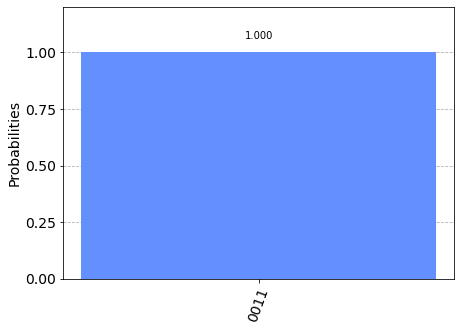

In [6]:
sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj, sim)
results = sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

In [7]:
# realize the balanced oracle in a classical circuit ie with regular python code
def balanced_oracle_classical(bits):
    # CNOT with if statements
    if bits[0] == 1:
        bits[4] = (bits[4] + 1) % 2
    if bits[1] == 2:
        bits[4] = (bits[4] + 1) % 2
    return bits[4]
           
bits = [0,0,0,0,0]
bits2 = [0, 1, 1, 1, 1]


print(balanced_oracle_classical(bits))
print(balanced_oracle_classical(bits2))

0
1
